# Table of Contents

- Image Thresholding with webcam
- Understanding convexhull

# Image Thresholding 

TUTORIAL: http://creat-tabu.blogspot.com/2013/08/opencv-python-hand-gesture-recognition.html 

In [ ]:
import cv2                              
import numpy as np     

cap = cv2.VideoCapture(0)               
while( cap.isOpened() ) :
       ret,img = cap.read()                        
       gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       blur = cv2.GaussianBlur(gray,(5,5),0)
       ret,thresh1 = cv2.threshold(blur,50,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
       cv2.imshow('input',thresh1)                  
       k = cv2.waitKey(10)
       if k == 27:
           break     

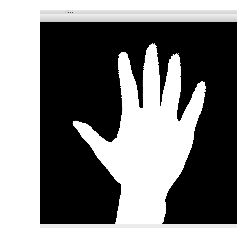

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread("reka.png")
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# Convexhull - static

TUTORIAL:https://www.learnopencv.com/convex-hull-using-opencv-in-python-and-c/

- Convex vs Concave
- Gift Wrapping algorithms

Converting the base image to gray scale


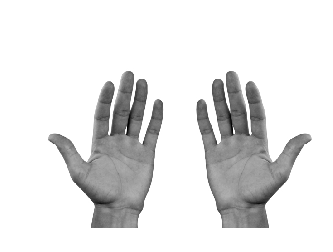

In [2]:
%matplotlib inline
import cv2         
import matplotlib.pyplot as plt
import numpy as np     

im = cv2.imread("rece.jpg", 1) # read input image
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert to grayscale
blur = cv2.blur(gray, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Converting the base image to gray scale")
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

In [11]:
import cv2
import numpy as np

img = cv2.imread('rece.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
_, contours, hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

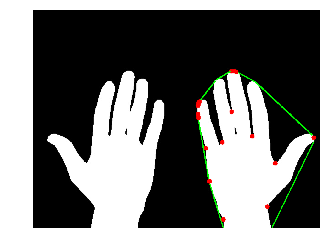

In [20]:
img = mpimg.imread("rece2.png")
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# Convexhull - webcam

- TUTORIAL: https://gogul09.github.io/software/hand-gesture-recognition-p1
- TUTORIAL II:https://gogul09.github.io/software/hand-gesture-recognition-p2

In [24]:
import cv2
import imutils
import numpy as np

# global variables
bg = None

#-------------------------------------------------------------------------------
# Function - To find the running average over the background
#-------------------------------------------------------------------------------
def run_avg(image, aWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, aWeight)
    
#-------------------------------------------------------------------------------
# Function - To segment the region of hand in the image
#-------------------------------------------------------------------------------
def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff,
                                threshold,
                                255,
                                cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (_, cnts, _) = cv2.findContours(thresholded.copy(),
                                    cv2.RETR_EXTERNAL,
                                    cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

#-------------------------------------------------------------------------------
# Main function
#-------------------------------------------------------------------------------
if __name__ == "__main__":
    # initialize weight for running average
    aWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590

    # initialize num of frames
    num_frames = 0

    # keep looping, until interrupted
    while(True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our running average model gets calibrated
        if num_frames < 30:
            run_avg(gray, aWeight)
        else:
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))
                cv2.imshow("Thesholded", thresholded)

        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0,255,0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break

# free up memory
camera.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

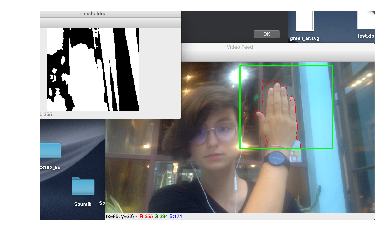

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

img = mpimg.imread("rece3.png")
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()